# PATIENT INFORMATION & HEALTH INSURANCE COST
## **MULTIPLE LINEAR REGRESSION MODEL (4)** 

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("final_data.csv")
data.head(3)

,Unnamed: 0,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,0,19,0,27.90,0,1,16884.9240,0,0,1
1,1,18,1,33.77,1,0,1725.5523,0,1,0
2,2,28,1,33.00,3,0,4449.4620,0,1,0


In [3]:
data.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)

In [4]:
data.head(3)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.90,0,1,16884.9240,0,0,1
1,18,1,33.77,1,0,1725.5523,0,1,0
2,28,1,33.00,3,0,4449.4620,0,1,0


## **Train & Test Sets**

In [5]:
X = data.drop(["charges", "region_northwest", "region_southeast", "region_southwest"], axis = 1) # Independent variables
y = data["charges"]    

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

PF = PolynomialFeatures(degree = 2)
X = PF.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20)

## **What Are Polynomial Features and Why Do We Use Them?**  
**Polynomial features are those features created by raising existing features to an exponent.**
- The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3.  
- This can help some machine learning algorithms make better predictions and is common for regression predictive modeling tasks and generally tasks that have numerical input variables.  
- Linear regression is linear in the model parameters and **adding polynomial terms to the model can be an effective way of allowing the model to identify nonlinear patterns.**

In [6]:
sets = [X_train, y_train, X_test, y_test]
for Set in sets:
    print(Set.shape)

(992, 21)
(992,)
(331, 21)
(331,)


## **Building a Model Using "scikit-learn"**

In [7]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
model = LR.fit(X_train, y_train)

print("Intercept :", model.intercept_)
print("Coefficients :\n", model.coef_)

Intercept : -771.3598969148134
Coefficients :
 [ 0.00000000e+00 -4.13970685e+01  9.09601343e+01  2.26788105e+02
  1.41424612e+03 -1.04480475e+04  3.46131860e+00  6.56827300e-01
  1.05705951e+00 -3.77347364e+00 -9.51323221e+00  9.09601343e+01
 -2.21351664e+01 -2.72755047e+02  6.14003120e+02 -4.08577076e+00
  1.55515020e+00  1.44975475e+03 -1.44682126e+02 -3.10474232e+02
 -1.04480475e+04]


## **Prediction** 

In [8]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print(f"Root mean squared error for train set : {rmse_train}")
print(f"Root mean squared error for test set : {rmse_test}")

Root mean squared error for train set : 4805.240843926541
Root mean squared error for test set : 3998.5930666867966


In [9]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, pred_train)
r2_test = r2_score(y_test, pred_test)

print(f"R2 Score for train set : {r2_train}")
print(f"R2 Score for test set : {r2_test}")

R2 Score for train set : 0.8172880309891237
R2 Score for test set : 0.9021757138369018


## **Validated Prediction Values**

In [10]:
from sklearn.model_selection import cross_val_score

val_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")).mean()
val_rmse_test = np.sqrt(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()

print(f"Validated root mean squared error for train set : {val_rmse_train}")
print(f"Validated root mean squared error for test set : {val_rmse_test}")

Validated root mean squared error for train set : 4809.289765424632
Validated root mean squared error for test set : 3864.0170516178405


In [11]:
val_r2_train = cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
val_r2_test = cross_val_score(model, X_test, y_test, cv = 10, scoring = "r2").mean()

print(f"Validated R2 Score for train set : {val_r2_train}")
print(f"Validated R2 Score for train set : {val_r2_test}")

Validated R2 Score for train set : 0.8079672789329362
Validated R2 Score for train set : 0.8979356585089897


## **Visualizations About Model Success**

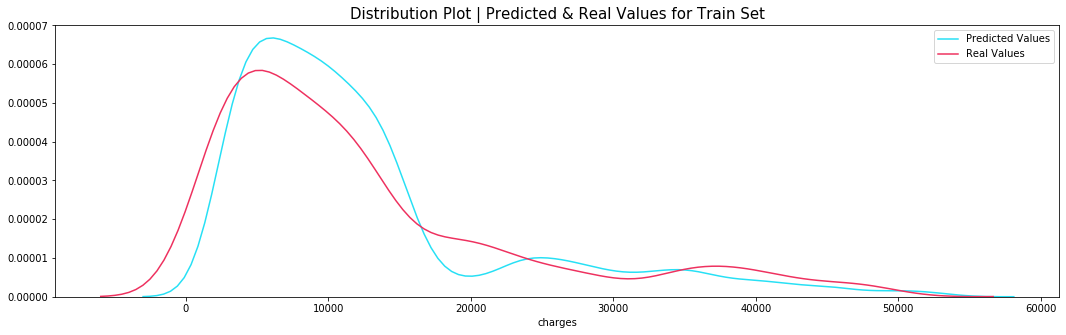

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,5))
sns.distplot(pred_train, hist = False, label = "Predicted Values", color = "#27E0F5")
sns.distplot(y_train, hist = False, label = "Real Values", color = "#EE315F")
plt.title("Distribution Plot | Predicted & Real Values for Train Set", fontsize = 15);

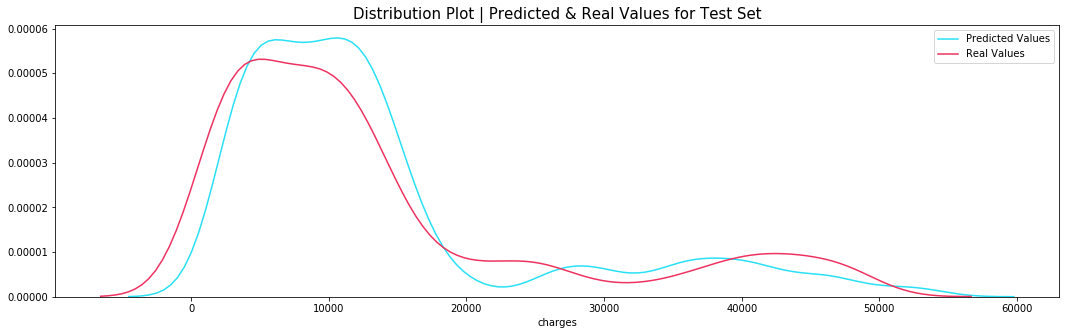

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18,5))
sns.distplot(pred_test, hist = False, label = "Predicted Values", color = "#27E0F5")
sns.distplot(y_test, hist = False, label = "Real Values", color = "#EE315F")
plt.title("Distribution Plot | Predicted & Real Values for Test Set", fontsize = 15);

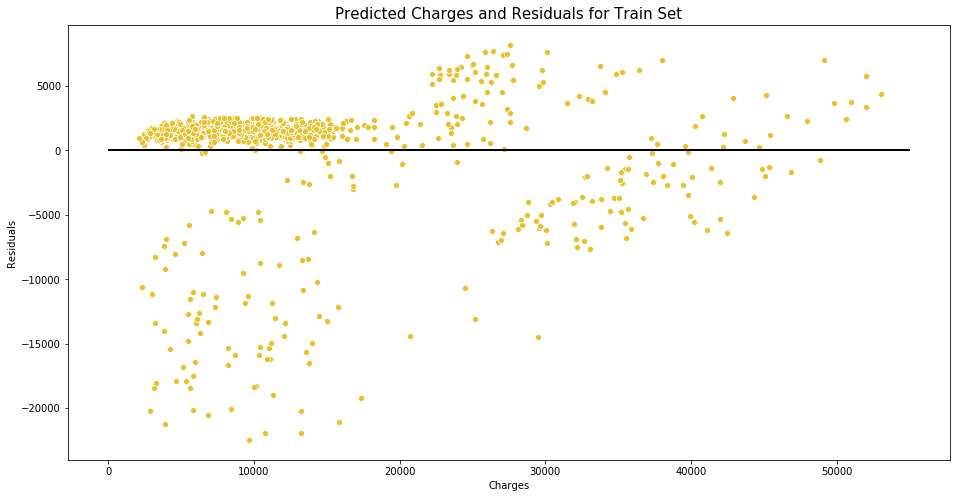

In [14]:
plt.figure(figsize = (15.8, 8))
sns.scatterplot(x = pred_train, y = (pred_train - y_train), color = "#E8C12A")
plt.hlines(y = 0, xmin = 0, xmax = 55000, lw = 2, color = "black")
plt.xlabel("Charges")
plt.ylabel("Residuals")
plt.title("Predicted Charges and Residuals for Train Set", fontsize = 15);

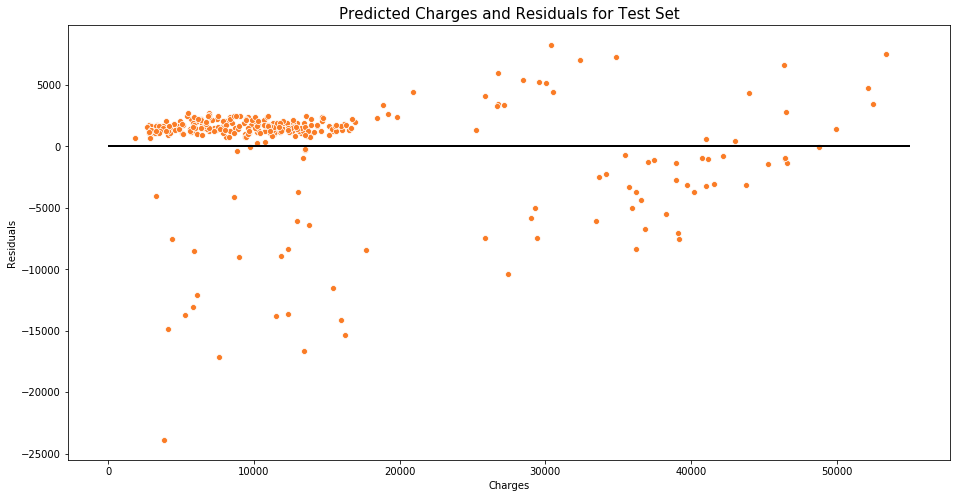

In [15]:
plt.figure(figsize = (15.8, 8))
sns.scatterplot(x = pred_test, y = (pred_test - y_test), color = "#FA7C26")
plt.hlines(y = 0, xmin = 0, xmax = 55000, lw = 2, color = "black")
plt.xlabel("Charges")
plt.ylabel("Residuals")
plt.title("Predicted Charges and Residuals for Test Set", fontsize = 15);